In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from daaloader import SkeletonPositions

In [2]:
key_points_2d_path = '/home/hussam/Documents/KIT/SS 2022/CV Praktikum/Dataset/Test Dataset/daa_pose3d_test/keypoints_2d/vp11/run1_2018-05-24-13-44-01.ids_1.manual.csv'
key_points_3d_path = '/home/hussam/Documents/KIT/SS 2022/CV Praktikum/Dataset/Test Dataset/daa_pose3d_test/keypoints_3d/vp11/run1_2018-05-24-13-44-01.ids_1.triangulated.3d.csv'
images_root_path = '/home/hussam/Documents/KIT/SS 2022/CV Praktikum/Dataset/Test Dataset/daa_pose3d_test/gt_images/vp11/run1_2018-05-24-13-44-01.ids_1'

In [3]:
key_points_2d = pd.read_csv(key_points_2d_path)
key_points_2d

,frame_id,timestamp,rEye_x,rEye_y,rEye_p,rEye_o,lEye_x,lEye_y,lEye_p,lEye_o,...,lKnee_p,lKnee_o,rHip_x,rHip_y,rHip_p,rHip_o,rKnee_x,rKnee_y,rKnee_p,rKnee_o
0,174,1.527162e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,263,1.527162e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,820.60,746.10,1.0,0.0,0.0,0.0,0.0,0.0
2,265,1.527162e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,818.30,734.40,1.0,0.0,0.0,0.0,0.0,0.0
3,271,1.527162e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,771.30,739.70,1.0,0.0,0.0,0.0,0.0,0.0
4,278,1.527162e+09,1215.7,315.8,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,775.02,721.32,1.0,0.0,1089.5,949.9,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,37173,1.527163e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073.00,728.00,1.0,0.0,0.0,0.0,0.0,0.0
232,37174,1.527163e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1104.80,725.60,1.0,0.0,0.0,0.0,0.0,0.0
233,37175,1.527163e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1136.40,722.30,1.0,0.0,0.0,0.0,0.0,0.0
234,37182,1.527163e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
key_points_3d = pd.read_csv(key_points_3d_path)
# key_points_3d.timestamp = pd.to_datetime(key_points_3d.timestamp, unit='s')
key_points_3d

,frame_id,timestamp,rEye_x,rEye_y,rEye_z,rEye_p,rEye_o,lEye_x,lEye_y,lEye_z,...,rHip_x,rHip_y,rHip_z,rHip_p,rHip_o,rKnee_x,rKnee_y,rKnee_z,rKnee_p,rKnee_o
0,174,1.527162e+09,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0
1,263,1.527162e+09,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.1975,0.2718,0.6884,1.0,0.0,0.5521,0.4921,0.4932,1.0,0.0
2,265,1.527162e+09,0.6459,-0.0263,0.3131,1.0,0.0,0.0,0.0,0.0,...,0.2137,0.2770,0.7075,1.0,0.0,0.5979,0.5205,0.5263,1.0,0.0
3,271,1.527162e+09,0.4096,-0.0864,0.3520,1.0,0.0,0.0,0.0,0.0,...,0.1806,0.2923,0.7332,1.0,0.0,0.4402,0.4228,0.4716,1.0,0.0
4,278,1.527162e+09,0.3535,-0.1178,0.3499,1.0,0.0,0.0,0.0,0.0,...,0.1716,0.2764,0.7445,1.0,0.0,0.0000,0.0000,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,37173,1.527163e+09,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0,0.4504,0.5951,0.5338,1.0,0.0
232,37174,1.527163e+09,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0,0.5105,0.6158,0.5705,1.0,0.0
233,37175,1.527163e+09,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.4216,0.1789,0.5032,1.0,0.0,0.5169,0.6010,0.5518,1.0,0.0
234,37182,1.527163e+09,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.7051,0.0892,0.4836,1.0,0.0,0.5930,0.4687,0.5324,1.0,0.0


In [5]:
n = 150

img_name = 'frame_' + str(key_points_2d.iloc[n, 0]) + '.jpg'

position_2d = key_points_2d.iloc[n, 2:]
position_2d = np.asarray(position_2d)
position_2d = position_2d.astype('float').reshape(-1, 4)
position_2d = position_2d[:,:2]

position_3d = key_points_3d.iloc[n, 2:]
position_3d = np.asarray(position_3d)
position_3d = position_3d.astype('float').reshape(-1, 5)
position_3d = position_3d[:,:3]

print('Image name: {}'.format(img_name))

print('position_2d shape: {}'.format(position_2d.shape))
print('First 4 position_2d: {}'.format(position_2d[:4]))

print('position_3d shape: {}'.format(position_3d.shape))
print('First 4 position_3d: {}'.format(position_3d[:4]))

Image name: frame_31838.jpg
position_2d shape: (15, 2)
First 4 position_2d: [[ 981.26  241.34]
 [1092.29  256.93]
 [1020.73  309.18]
 [ 922.8   358.5 ]]
position_3d shape: (15, 3)
First 4 position_3d: [[ 0.2059 -0.1633  0.3421]
 [ 0.2697 -0.1521  0.3381]
 [ 0.2284 -0.1146  0.347 ]
 [ 0.2745 -0.1528  0.5558]]


In [6]:
def show_landmarks(image, key_points_2d):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(key_points_2d[:, 0], key_points_2d[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated


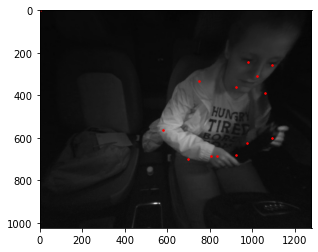

In [7]:
plt.figure()
show_landmarks(io.imread(os.path.join(images_root_path, img_name)),
               position_2d)
plt.show()

0 (1024, 1280, 3) (15, 2)


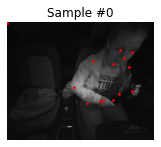

1 (1024, 1280, 3) (15, 2)


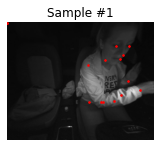

2 (1024, 1280, 3) (15, 2)


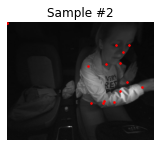

3 (1024, 1280, 3) (15, 2)


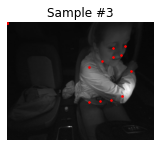

In [8]:
daa_dataset = SkeletonPositions(csv_file_2d=key_points_2d_path,
                                csv_file_3d=key_points_3d_path,
                                image_root_dir=images_root_path)



fig = plt.figure()

for i in range(len(daa_dataset)):
    sample = daa_dataset[i+150]

    print(i, sample['image'].shape, sample['key_points_2d'].shape)

    ax = plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(sample['image'], sample['key_points_2d'])

    if i == 3:
        plt.show()
        break

In [9]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, key_points_2d, key_points_3d = sample['image'], sample['key_points_2d'], sample['key_points_3d']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'key_points_2d': torch.from_numpy(key_points_2d),
                'key_points_3d': torch.from_numpy(key_points_3d)}

In [10]:
transformed_dataset = SkeletonPositions(key_points_2d_path,
                                        key_points_3d_path,
                                        images_root_path,
                                        transform=transforms.Compose([
                                               ToTensor(),
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['key_points_2d'].size())

    if i == 3:
        break

0 torch.Size([3, 1024, 1280]) torch.Size([15, 2])
1 torch.Size([3, 1024, 1280]) torch.Size([15, 2])
2 torch.Size([3, 1024, 1280]) torch.Size([15, 2])
3 torch.Size([3, 1024, 1280]) torch.Size([15, 2])


0 torch.Size([4, 3, 1024, 1280]) torch.Size([4, 15, 2])
1 torch.Size([4, 3, 1024, 1280]) torch.Size([4, 15, 2])
2 torch.Size([4, 3, 1024, 1280]) torch.Size([4, 15, 2])
3 torch.Size([4, 3, 1024, 1280]) torch.Size([4, 15, 2])


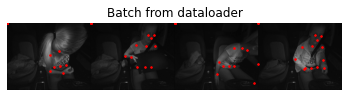

In [11]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, key_points_2d_batch, key_points_3d_batch = \
            sample_batched['image'], sample_batched['key_points_2d'], sample_batched['key_points_2d']
    batch_size = len(images_batch)
    im_size = images_batch.size(3)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(key_points_2d_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    key_points_2d_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change "num_workers" to 0.

# if __name__ == '__main__':
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['key_points_2d'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break